In [5]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784')


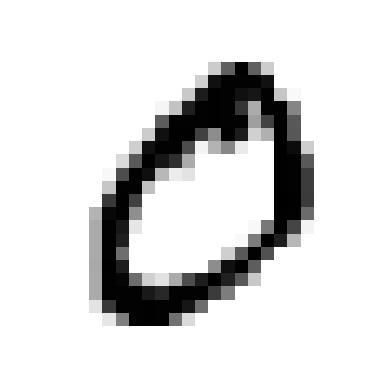

In [15]:
x,y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[1]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary",interpolation='nearest')
plt.axis("off")
plt.show()


In [12]:
x_train, x_test, y_train, y_test = x[:60000].to_numpy(), x[60000:70000].to_numpy(), y[:60000].to_numpy(), y[60000:70000].to_numpy()

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [13]:

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train, y_train_2)

y_pred_rf = rnd_clf.predict(x_test)
accuracy_score(y_test_2, y_pred_rf)


0.9887

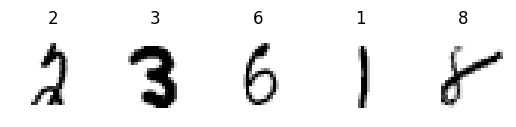

In [16]:


import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap="binary", interpolation='nearest')
  plt.axis("off")
  plt.title(y_train[i])

plt.show()


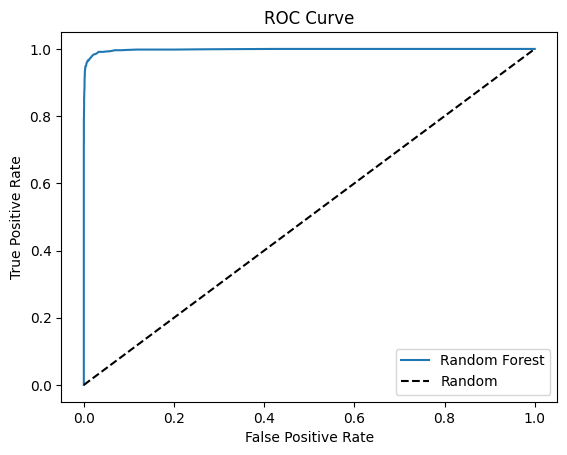

AUC: 0.9981333825176856


In [17]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs_rf = rnd_clf.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test_2, y_probs_rf)


plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test_2, y_probs_rf)
print("AUC:", auc)
